https://www.kaggle.com/code/aashnaashahh1504/image-classification-with-cnn/notebook

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [2]:
plt.rcParams['figure.figsize'] = (20,6)

## Data Loading

In [6]:
img_size = 150
batch_size = 64

train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=30, horizontal_flip=True, 
                                width_shift_range=0.1, height_shift_range=0.1, validation_split=0.2)
test_dagtagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Cat Dog Classification\dataset\training_set",
                                                   target_size=(img_size, img_size),
                                                   batch_size=batch_size, 
                                                   shuffle = True,
                                                   class_mode = 'binary',
                                                   subset='training')
val_generator = train_datagen.flow_from_directory(r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Cat Dog Classification\dataset\training_set",
                                                   target_size=(img_size, img_size),
                                                   batch_size=batch_size, 
                                                   shuffle = False,
                                                   class_mode = 'binary',
                                                   subset='validation')

test_generator = test_dagtagen.flow_from_directory(r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Cat Dog Classification\dataset\test_set",
                                                  target_size=(img_size, img_size),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  class_mode='binary')

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Visualization our Data

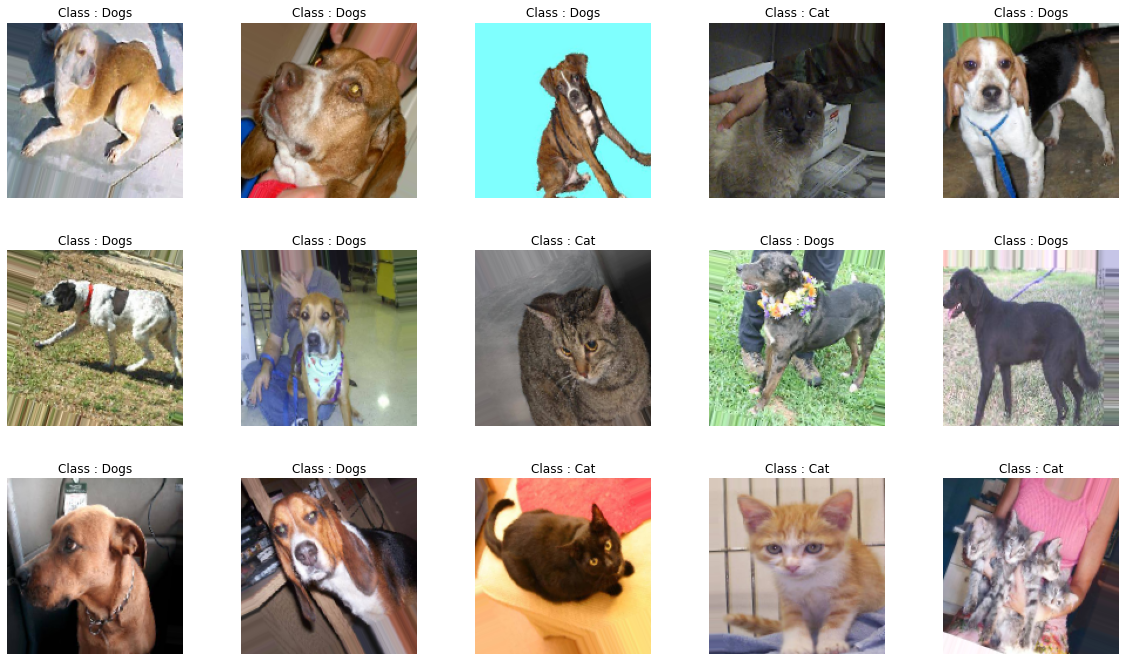

In [8]:
labels = ['Cat', 'Dogs']
samples = train_generator.__next__()
images = samples[0]
targets = samples[1]

plt.figure(figsize=(20,20))
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class : {labels[int(targets[i])]}")
    plt.axis('off')

##### Access information about object

In [10]:
train_generator.__next__()[1].shape

(64,)

### Build and train our model

In [11]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

In [12]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(img_size, img_size, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), input_shape=(img_size, img_size, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), input_shape=(img_size, img_size, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), input_shape=(img_size, img_size, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.layers

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [17]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
100/100 [==============================] - 120s 1s/step - loss: 0.6833 - acc: 0.5611 - val_loss: 0.6239 - val_acc: 0.6569
Epoch 2/10
100/100 [==============================] - 58s 584ms/step - loss: 0.6063 - acc: 0.6706 - val_loss: 0.5818 - val_acc: 0.7013
Epoch 3/10
100/100 [==============================] - 56s 557ms/step - loss: 0.5725 - acc: 0.7048 - val_loss: 0.5392 - val_acc: 0.7325
Epoch 4/10
100/100 [==============================] - 57s 569ms/step - loss: 0.5318 - acc: 0.7325 - val_loss: 0.5089 - val_acc: 0.7581
Epoch 5/10
100/100 [==============================] - 58s 575ms/step - loss: 0.4967 - acc: 0.7588 - val_loss: 0.4859 - val_acc: 0.7600
Epoch 6/10
100/100 [==============================] - 60s 597ms/step - loss: 0.4900 - acc: 0.7638 - val_loss: 0.4677 - val_acc: 0.7731
Epoch 7/10
100/100 [==============================] - 56s 561ms/step - loss: 0.4653 - acc: 0.7783 - val_loss: 0.4543 - val_acc: 0.7856
Epoch 8/10
100/100 [==============================] - 58s

### Model Evaluation

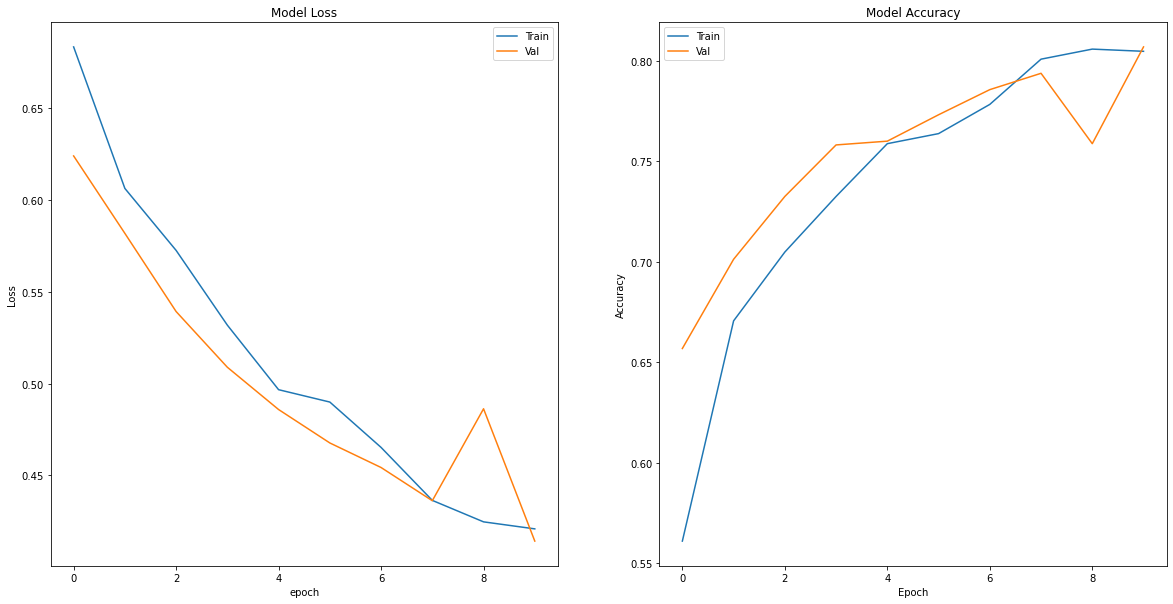

In [24]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel("Loss")
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

### 6 Model Evaluation

In [25]:
classes = test_generator.classes
y_pred = model.predict(test_generator)
y_pred[y_pred < 0.5] = 0
y_pred[y_pred > 0.5] = 1

32/32 [==============================] - 19s 601ms/step


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
print(classification_report(classes, y_pred, target_names=labels))

              precision    recall  f1-score   support

         Cat       0.85      0.80      0.83      1000
        Dogs       0.81      0.86      0.84      1000

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



In [28]:
confusion_matrix(classes, y_pred)

array([[801, 199],
       [136, 864]], dtype=int64)

In [32]:
print(f"Accuracy is : {round(accuracy_score(classes, y_pred)*100, 2)}%")

Accuracy is : 83.25%
